# Computer Vision: Assignment 3 Part 1 - Some CNN Basics [40%]

Spring 2021 semester.

Due date: **July 19th 2021.**

## Introduction

This question is an introduction to using PyTorch for training simple neural net models. 

Two different datasets will be used: 
- MNIST digits [handwritten digits]
- CIFAR-10 [32x32 resolution color images of 10 object classes].

## Requirements

Perform this assignment in PyTorch, modifying the baseline code, producing outputs and adding required explanations - *all within this ipython notebook*.

Finally, submit this iPython notebook, including outputs, as an .ipynb file (exact submission guidelines will be given in the next couple of days). 

## Question (1): Warmup [5%]

It is always good practice to visually inspect your data before trying to train a model, since it lets you check for problems and get a feel for the task at hand.

MNIST is a dataset of 70,000 grayscale hand-written digits (0 through 9).
60,000 of these are training images. 10,000 are a held out test set. 

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). 
The train/test split is 50k/10k.

**a)**  Use `matplotlib` and ipython notebook's visualization capabilities to display one train and one test image of each class, for each of the two datasets.
[See this PyTorch tutorial page](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py) for hints on how to achieve this.

** Relevant Cell: "Data Loading" **

## Question (2): Training a Single Layer Network on MNIST [10%]

Start by running the training on MNIST. By default if you run this notebook successfully, it will train on MNIST.

This will initialize a single layer model train it on the 60,000 MNIST training images for 10 epochs (passes through the training data). 

The loss function [cross_entropy](http://pytorch.org/docs/master/nn.html?highlight=cross_entropy#torch.nn.functional.cross_entropy) computes a Logarithm of the Softmax on the output of the neural network, and then computes the negative log-likelihood w.r.t. the given `target`.

The default values for the learning rate, batch size and number of epochs are given in the "options" cell of this notebook. Unless otherwise specified, use the default values throughout this assignment. 

Note the decrease in training loss and corresponding decrease in validation errors.

**a)** Add code to plot out the network weights as images (one for each output, of size 28 by 28) after the last epoch. (Hint threads: [#1](https://discuss.pytorch.org/t/understanding-deep-network-visualize-weights/2060/2?u=smth) [#2](https://github.com/pytorch/vision#utils) )

**b)** Reduce the number of training examples to just 50. [Hint: limit the iterator in the `train` function]. 
Paste the output into your report and explain what is happening to the model.

## Question (3): Training a Multi-Layer Network on MNIST [10%]

**a)**  Add an extra layer to the network with 1000 hidden units and a `tanh` non-linearity. [Hint: modify the `Net` class] and train the model for 10 epochs.

**b)**   Now set the learning rate to 10 and retrain. Give a brief explanation to the observed results.

## Question (4): Training a Convolutional Network on CIFAR [15%]

To change over to the CIFAR-10 dataset, change the `options` cell's `dataset` variable to `'cifar10'`.

- Create a convolutional network with the following architecture:
  - Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Flatten to vector.
  - Linear layer with 64 hidden units + Tanh nonlinearity.
  - Linear layer to 10 output units.

**a)** Train it for 20 epochs on the CIFAR-10 training set and Visualize the first layer filters.

Hints: [Follow the first PyTorch tutorial](http://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py) or look at the [MNIST example](https://github.com/pytorch/examples/tree/master/mnist)

**b)**  Give a breakdown of the number of parameters within the above model, as well as the overall number.

# ***Example Code***

In [1]:
# imports
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [2]:
# options
dataset = 'mnist' # options: 'mnist' | 'cifar10'
batch_size = 64   # input batch size for training
epochs = 10       # number of epochs to train
lr = 0.01        # learning rate

In [3]:
# Data Loading
# Warning: this cell might take some time when you run it for the first time, 
#          because it will download the datasets from the internet
if dataset == 'mnist':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)

elif dataset == 'cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw




Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw




Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.linear(input)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [5]:
# train and test functions
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test():
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        #data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        #test_loss += F.cross_entropy(output, target, sum=True).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


In [6]:
# Training
for i in range(1, epochs+1):
  train(i)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.427200
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.683845
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.532440
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.492337
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.431717
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.379034
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.281224
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.436926
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.343171
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.261521
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.298623
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.268718
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.558466
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.461245
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.235825
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.202608
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.235038
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.327917
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.353679
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.403923
Train Epoch:

In [7]:
# Testing
test()


Test set: Average loss: 0.2766, Accuracy: 9220/10000 (92%)



# **Answer (1):**


In [55]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

def imshow(img):
    if dataset =='mnist':
        img = img*0.3081 + 0.1307 # unnormalize
    elif dataset == 'cifar10':
        img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [56]:
dataset = 'mnist'

data_transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])
trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

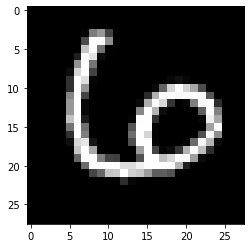

In [57]:
# get one random training image from mnist dataset
dataiter = iter(train_loader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images[0]))

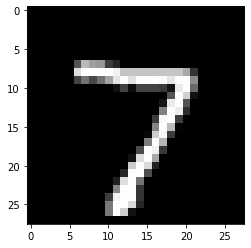

In [58]:
# get one random test image from mnist dataset
dataiter = iter(test_loader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images[0]))

In [12]:
dataset = 'cifar10'

data_transform = transforms.Compose([ transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),])
trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)


Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified


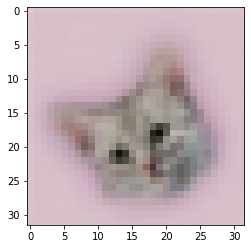

In [53]:
# get one random training image from cifar10 dataset
dataiter = iter(train_loader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images[0]))

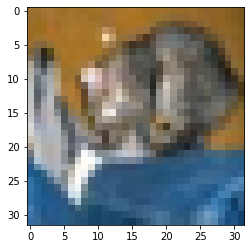

In [14]:
# get one random test image from cifar10 dataset
dataiter = iter(test_loader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images[0]))

# **Answer (2):**


In [15]:
dataset = 'mnist'

data_transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])
trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

## (a)

In [16]:
# plot out the network weights as images (one for each output, of size 28 by 28) after the last epoch.
def plot_network_weights(num_outputs, size):
    for m in network.modules():
        if isinstance(m, nn.Linear):           
            imshow(torchvision.utils.make_grid(m.weight.data.cpu().view(num_outputs,1,size,size),normalize=True, scale_each=True))

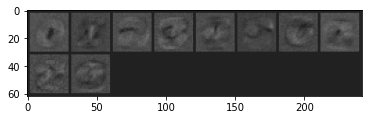

In [17]:
plot_network_weights(10,28)

## (b)

In [18]:
import torch.utils.data.sampler as samplers

class SubsetSampler(samplers.Sampler):
    def __init__(self, data_source, num_samples):
        self.data_source = data_source
        if num_samples < len(self.data_source):
            self.num_samples = num_samples
        else:
            self.num_samples = len(self.data_source)
            
    def __iter__(self):
        return iter(range(self.num_samples))

    def __len__(self):
        return self.num_samples

In [19]:
examples = 50
train_loader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle = False, sampler = SubsetSampler(trainset, examples), num_workers = 0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size = batch_size, shuffle = False, sampler = SubsetSampler(testset, examples), num_workers = 0)

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr = lr)

In [20]:
epochs = 70
# Training
for i in range(1, epochs+1):
  train(i)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.466944
Train Epoch: 2 [0/60000 (0%)]	Loss: 2.230295
Train Epoch: 3 [0/60000 (0%)]	Loss: 2.028136
Train Epoch: 4 [0/60000 (0%)]	Loss: 1.854823
Train Epoch: 5 [0/60000 (0%)]	Loss: 1.705339
Train Epoch: 6 [0/60000 (0%)]	Loss: 1.574916
Train Epoch: 7 [0/60000 (0%)]	Loss: 1.459786
Train Epoch: 8 [0/60000 (0%)]	Loss: 1.357350
Train Epoch: 9 [0/60000 (0%)]	Loss: 1.265771
Train Epoch: 10 [0/60000 (0%)]	Loss: 1.183615
Train Epoch: 11 [0/60000 (0%)]	Loss: 1.109685
Train Epoch: 12 [0/60000 (0%)]	Loss: 1.042952
Train Epoch: 13 [0/60000 (0%)]	Loss: 0.982527
Train Epoch: 14 [0/60000 (0%)]	Loss: 0.927644
Train Epoch: 15 [0/60000 (0%)]	Loss: 0.877642
Train Epoch: 16 [0/60000 (0%)]	Loss: 0.831953
Train Epoch: 17 [0/60000 (0%)]	Loss: 0.790085
Train Epoch: 18 [0/60000 (0%)]	Loss: 0.751617
Train Epoch: 19 [0/60000 (0%)]	Loss: 0.716180
Train Epoch: 20 [0/60000 (0%)]	Loss: 0.683456
Train Epoch: 21 [0/60000 (0%)]	Loss: 0.653168
Train Epoch: 22 [0/60000 (0%)]	Loss: 0.6250

In [21]:
# Testing
test()


Test set: Average loss: 0.0058, Accuracy: 33/10000 (0%)



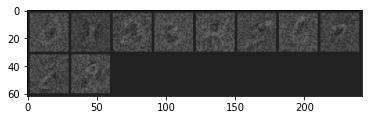

In [22]:
plot_network_weights(10,28)

# **Answer (3):**


## (a) 

In [23]:
train_loader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle = True, num_workers = 0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size = batch_size, shuffle = False, num_workers = 0)

In [24]:
class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, H):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(num_inputs, H)
        self.fc2 = nn.Linear(H, num_outputs)

    def forward(self, x):
        x = x.view(-1, num_inputs) # reshape input to batch x num_inputs
        x = self.fc1(x)
        x = torch.tanh(x)
        x = self.fc2(x)
        return x

In [25]:
#Network with 1000 hidden units and a tanh non-linearity. 
network = Net(num_inputs, num_outputs, 1000)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [26]:
#Train the model for 10 epochs
epochs = 10
# Training
for i in range(1, epochs+1):
  train(i)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.333891
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.654605
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.591460
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.480337
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.335531
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.235452
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.263364
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.248142
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.336905
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.323218
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.356545
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.264972
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.313373
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.204022
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.264902
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.248979
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.202059
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.148044
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.226173
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.204688
Train Epoch:

In [27]:
# Testing
test()


Test set: Average loss: 0.1621, Accuracy: 9528/10000 (95%)



## (b)

In [28]:
train_loader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle = True, num_workers = 0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size = batch_size, shuffle = False, num_workers = 0)

In [29]:
network = Net(num_inputs, num_outputs, 1000)
optimizer = optim.SGD(network.parameters(), lr=10) #The learning rate equal to 10

In [30]:
epochs = 10
# Training
for i in range(1, epochs+1):
  train(i)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.342108
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1126.799561
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1248.918335
Train Epoch: 1 [19200/60000 (32%)]	Loss: 1127.593018
Train Epoch: 1 [25600/60000 (43%)]	Loss: 515.197937
Train Epoch: 1 [32000/60000 (53%)]	Loss: 327.176453
Train Epoch: 1 [38400/60000 (64%)]	Loss: 384.828613
Train Epoch: 1 [44800/60000 (75%)]	Loss: 166.546570
Train Epoch: 1 [51200/60000 (85%)]	Loss: 173.876801
Train Epoch: 1 [57600/60000 (96%)]	Loss: 393.104309
Train Epoch: 2 [0/60000 (0%)]	Loss: 793.141174
Train Epoch: 2 [6400/60000 (11%)]	Loss: 454.735046
Train Epoch: 2 [12800/60000 (21%)]	Loss: 140.777679
Train Epoch: 2 [19200/60000 (32%)]	Loss: 459.305908
Train Epoch: 2 [25600/60000 (43%)]	Loss: 280.084137
Train Epoch: 2 [32000/60000 (53%)]	Loss: 167.675812
Train Epoch: 2 [38400/60000 (64%)]	Loss: 121.783058
Train Epoch: 2 [44800/60000 (75%)]	Loss: 425.216370
Train Epoch: 2 [51200/60000 (85%)]	Loss: 249.453033
Train Epoch: 2 [57600/6

In [31]:
# Testing
test()


Test set: Average loss: 108.8977, Accuracy: 7689/10000 (77%)



# **Answer (4):**


## (a)

In [32]:
dataset = 'cifar10'

data_transform = transforms.Compose([ transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),])
trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

Files already downloaded and verified
Files already downloaded and verified


In [33]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(iter(train_loader).next()[0].size()[1], 16, 5)
        self.pool = torch.nn.MaxPool2d(2, 2) # Max pooling over a (2, 2) window
        self.conv2 = nn.Conv2d(16, 128, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(128 * 5 * 5, 64) # 5*5 from image dimension
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(torch.tanh(self.conv1(x)))
        x = self.pool(torch.tanh(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = torch.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

# num_channels = iter(train_loader).next()[0].size()[1]
network = Net()
optimizer = optim.SGD(network.parameters(), lr=lr)

In [34]:
# Train it for 20 epochs on the CIFAR-10 training set.
epochs = 20
# Training
for i in range(1, epochs+1):
  train(i)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Train Epoch: 1 [0/50000 (0%)]	Loss: 2.290037
Train Epoch: 1 [6400/50000 (13%)]	Loss: 2.164172
Train Epoch: 1 [12800/50000 (26%)]	Loss: 2.012624
Train Epoch: 1 [19200/50000 (38%)]	Loss: 1.954379
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.809927
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.793685
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.952808
Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.872256
Train Epoch: 2 [0/50000 (0%)]	Loss: 1.931609
Train Epoch: 2 [6400/50000 (13%)]	Loss: 1.727493
Train Epoch: 2 [12800/50000 (26%)]	Loss: 1.736143
Train Epoch: 2 [19200/50000 (38%)]	Loss: 1.649434
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.623495
Train Epoch: 2 [32000/50000 (64%)]	Loss: 1.627946
Train Epoch: 2 [38400/50000 (77%)]	Loss: 1.569439
Train Epoch: 2 [44800/50000 (90%)]	Loss: 1.561971
Train Epoch: 3 [0/50000 (0%)]	Loss: 1.460133
Train Epoch: 3 [6400/50000 (13%)]	Loss: 1.461952
Train Epoch: 3 [12800/50000 (26%)]	Loss: 1.705615
Train Epoch: 3 [19200/50000 (38%)]	Loss: 1.599864
Train Epoch: 3 [25

In [35]:
# Testing
test()


Test set: Average loss: 0.9560, Accuracy: 6705/10000 (67%)



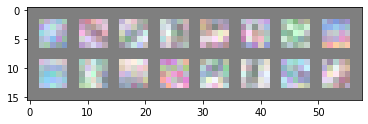

In [36]:
# Visualize the first layer filters.
for x in network.modules():
    if isinstance(x, nn.Conv2d):
        imshow(torchvision.utils.make_grid(x.weight.data.cpu(),normalize=True, scale_each=True))
        break

## (b)

In [37]:
#Explanation in report
overall_parameters = 0
for p in network.parameters():
    count = np.prod(p.size())
    overall_parameters += count
print("The overall number of parameters =", overall_parameters)

The overall number of parameters = 258058
